In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [3]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

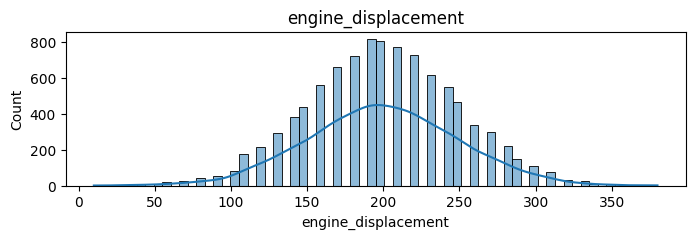

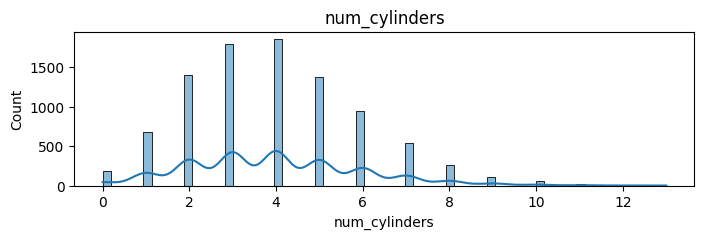

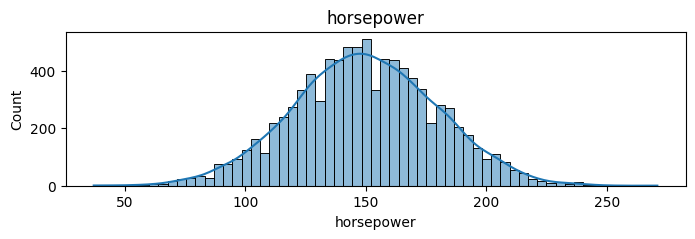

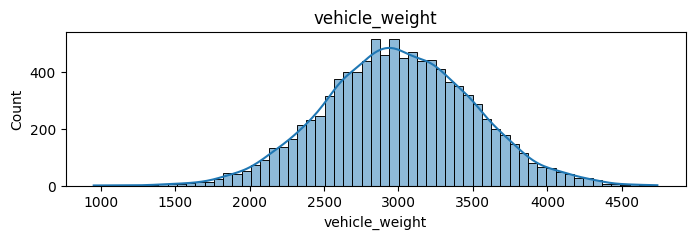

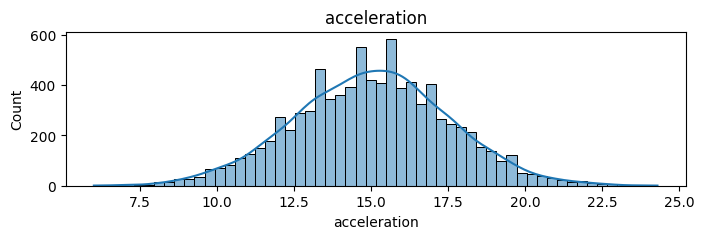

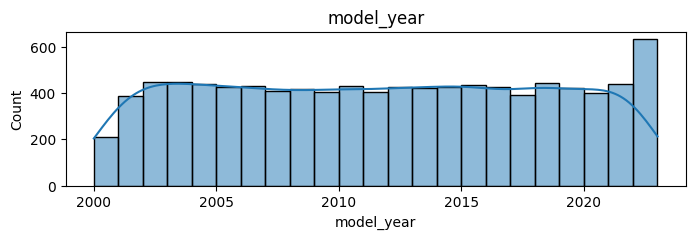

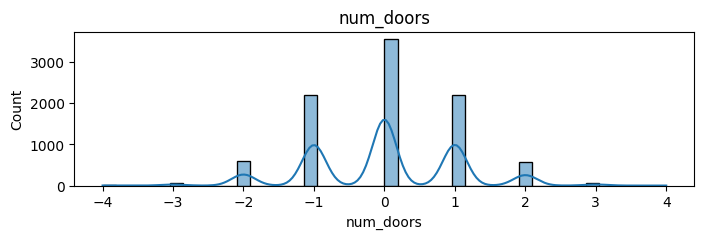

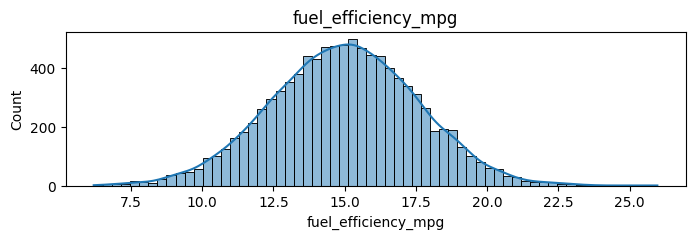

In [4]:
for c in numerical_cols:
    plt.figure(figsize=(8,2))
    sns.histplot(df[c],kde=True)
    plt.title(c)
    plt.show()

In [5]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [6]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [7]:
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


In [8]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state=1)
df_train.shape, df_val.shape, df_test.shape


((5822, 11), (1941, 11), (1941, 11))

In [9]:
df_train.reset_index(inplace=True, drop=True)
df_val.reset_index(inplace=True, drop = True)
df_test.reset_index(inplace=True, drop = True)


In [10]:
y_train = df_train['fuel_efficiency_mpg'].values
y_test=df_test['fuel_efficiency_mpg'].values
y_val=df_val['fuel_efficiency_mpg'].values
del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']

In [11]:
cols_t = df_train.to_dict(orient='records')
cols_te = df_test.to_dict(orient='records')
cols_v = df_val.to_dict(orient='records')


In [12]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(cols_t)
X_test = dv.transform(cols_te)
X_val = dv.transform(cols_v)
X_train.shape, X_test.shape, X_val.shape
    

((5822, 14), (1941, 14), (1941, 14))

In [13]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [14]:
feature_names = dv.get_feature_names_out()
feature_index = model.tree_.feature[0]
print(feature_names[feature_index])

vehicle_weight


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(rmse  )



0.45957772230927263


In [20]:
print("Shape X_val_vec:", X_val.shape)
print("Shape y_val:", y_val.shape)
print("RMSE:", np.sqrt(mean_squared_error(y_val, model.predict(X_val))))


Shape X_val_vec: (1941, 14)
Shape y_val: (1941,)
RMSE: 1.6104639028827594
